In [1]:
# 1: Import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

print("Libraries imported successfully")


Libraries imported successfully


In [2]:
# 2: Load the dataset

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

columns = [
    "Pregnancies",
    "Glucose",
    "BloodPressure",
    "SkinThickness",
    "Insulin",
    "BMI",
    "DiabetesPedigreeFunction",
    "Age",
    "Outcome"
]

df = pd.read_csv(url, names=columns)

df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# 3: Dataset overview

print("Shape of dataset:", df.shape)

print("\nDataset Info:")
df.info()

print("\nMissing values per column:")
df.isnull().sum()


Shape of dataset: (768, 9)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB

Missing values per column:


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [4]:
# 2.2: View column names
df.columns


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
# 2.3: Check target distribution
df['Outcome'].value_counts()


,count
Outcome,
0,500
1,268


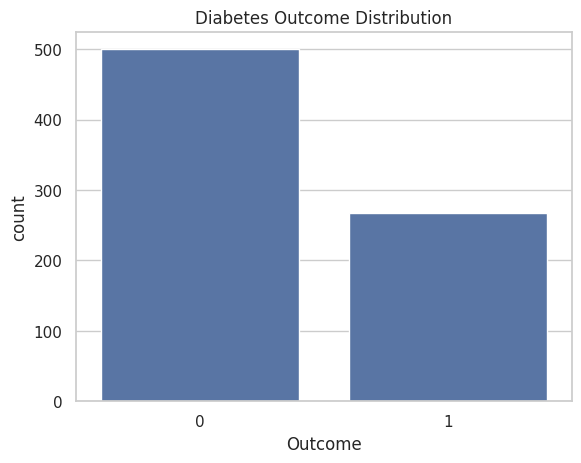

In [6]:
# 2.4: Visualize target variable

sns.countplot(x='Outcome', data=df)
plt.title("Diabetes Outcome Distribution")
plt.show()


In [7]:
# 3.3: Check zero values in important columns

zero_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in zero_columns:
    print(col, ":", (df[col] == 0).sum())


Glucose : 5
BloodPressure : 35
SkinThickness : 227
Insulin : 374
BMI : 11


In [8]:
# 3.4: Replace 0 with NaN for selected columns

df[zero_columns] = df[zero_columns].replace(0, np.nan)

# Check missing values again
df.isnull().sum()


,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [9]:
# 4.1: Fill missing values using median

for col in zero_columns:
    df[col].fillna(df[col].median(), inplace=True)

df.isnull().sum()


/tmp/ipython-input-2021434710.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [10]:
# 4.2: Verify data after imputation
df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [11]:
# 5.1: Separate features and target

X = df.drop('Outcome', axis=1)
y = df['Outcome']

print("Feature shape:", X.shape)
print("Target shape:", y.shape)


Feature shape: (768, 8)
Target shape: (768,)


In [12]:
# 5.1: Separate features and target

X = df.drop('Outcome', axis=1)
y = df['Outcome']

print("Feature shape:", X.shape)
print("Target shape:", y.shape)


Feature shape: (768, 8)
Target shape: (768,)


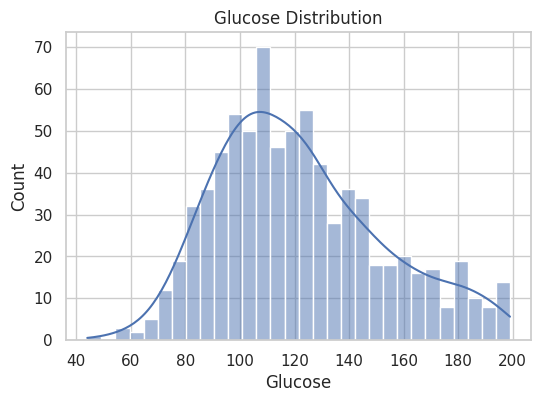

In [13]:
# 5.2: Distribution of Glucose

plt.figure(figsize=(6,4))
sns.histplot(df['Glucose'], bins=30, kde=True)
plt.title("Glucose Distribution")
plt.show()


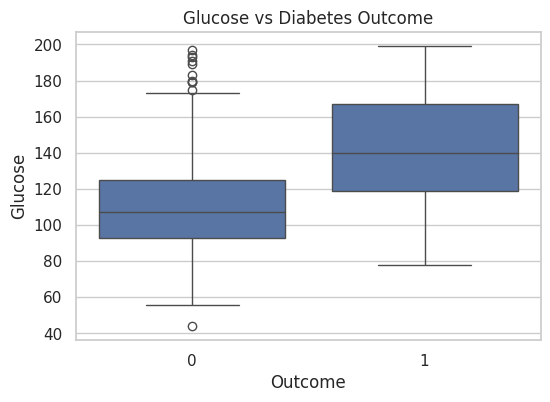

In [14]:
# 5.3: Glucose vs Outcome

plt.figure(figsize=(6,4))
sns.boxplot(x='Outcome', y='Glucose', data=df)
plt.title("Glucose vs Diabetes Outcome")
plt.show()


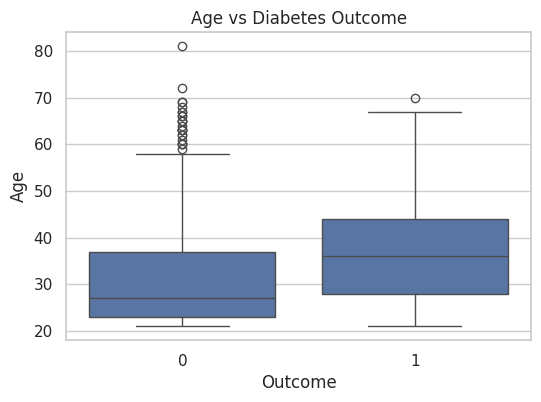

In [15]:
# 5.4: Age vs Outcome

plt.figure(figsize=(6,4))
sns.boxplot(x='Outcome', y='Age', data=df)
plt.title("Age vs Diabetes Outcome")
plt.show()


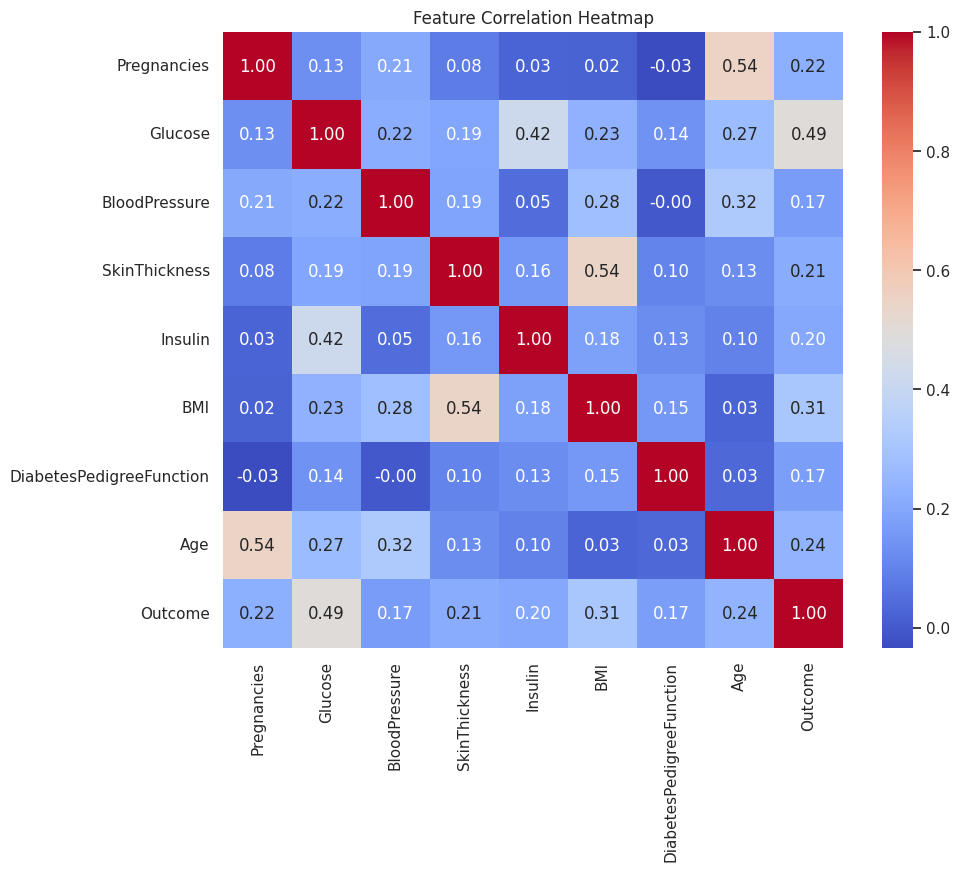

In [16]:
# 5.5: Correlation heatmap

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


Project Status:
- Step 1–4: Data loading & cleaning completed
- Step 5: EDA completed (distributions, boxplots, heatmap)
Date: 29-Dec-2025


In [17]:
# 6.1: Import StandardScaler

from sklearn.preprocessing import StandardScaler


In [18]:
# 6.2: Initialize the scaler

scaler = StandardScaler()


In [19]:
X_scaled = scaler.fit_transform(X)


In [20]:
# 6.4: Convert scaled array to DataFrame

X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

X_scaled.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.866045,-0.031990,0.670643,-0.181541,0.166619,0.468492,1.425995
1,-0.844885,-1.205066,-0.528319,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672
2,1.233880,2.016662,-0.693761,-0.012301,-0.181541,-1.332500,0.604397,-0.105584
3,-0.844885,-1.073567,-0.528319,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549
4,-1.141852,0.504422,-2.679076,0.670643,0.316566,1.549303,5.484909,-0.020496


In [21]:
# 6.5: Verify scaling statistics

X_scaled.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,-6.476301e-17,4.625929e-18,5.782412e-18,-1.526557e-16,1.503427e-17,2.613650e-16,2.451743e-16,1.931325e-16
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00
min,-1.141852e+00,-2.552931e+00,-4.002619e+00,-2.516429e+00,-1.467353e+00,-2.074783e+00,-1.189553e+00,-1.041549e+00
25%,-8.448851e-01,-7.201630e-01,-6.937615e-01,-4.675972e-01,-2.220849e-01,-7.212087e-01,-6.889685e-01,-7.862862e-01
50%,-2.509521e-01,-1.530732e-01,-3.198993e-02,-1.230129e-02,-1.815412e-01,-2.258989e-02,-3.001282e-01,-3.608474e-01
75%,6.399473e-01,6.112653e-01,6.297816e-01,3.291706e-01,-1.554775e-01,6.032562e-01,4.662269e-01,6.602056e-01
max,3.906578e+00,2.542658e+00,4.104082e+00,7.955377e+00,8.170442e+00,5.042397e+00,5.883565e+00,4.063716e+00


In [22]:
# 7.1: Import train_test_split

from sklearn.model_selection import train_test_split


In [23]:
# 7.2: Train-test split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [24]:
# 7.3: Check split shapes

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (614, 8)
X_test shape: (154, 8)
y_train shape: (614,)
y_test shape: (154,)


In [25]:
# 8.2: Import Logistic Regression

from sklearn.linear_model import LogisticRegression


In [26]:
# 8.3: Initialize Logistic Regression model

log_reg = LogisticRegression(max_iter=1000)


In [27]:
# 8.4: Train the model

log_reg.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [28]:
# 8.5: Make predictions

y_pred_lr = log_reg.predict(X_test)


In [29]:
# 8.6: Accuracy score

from sklearn.metrics import accuracy_score

accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_lr


0.7012987012987013

In [30]:
# 9.2: Import evaluation metrics

from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    precision_score,
    recall_score,
    f1_score
)


In [31]:
# 9.3: Confusion Matrix

cm = confusion_matrix(y_test, y_pred_lr)
cm


array([[81, 19],
       [27, 27]])

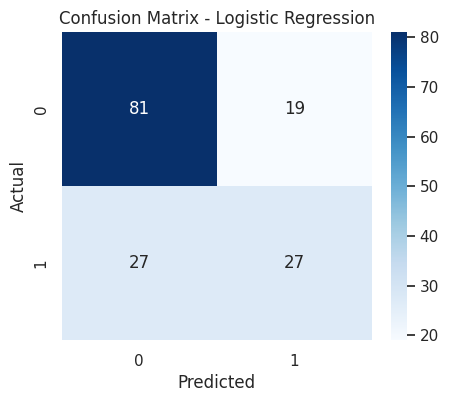

In [32]:
# 9.4: Confusion Matrix Heatmap

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


In [33]:
# 9.5: Precision, Recall, F1

precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)

print("Precision:", precision_lr)
print("Recall:", recall_lr)
print("F1 Score:", f1_lr)


Precision: 0.5869565217391305
Recall: 0.5
F1 Score: 0.54


In [34]:
# 9.6: Classification Report

print(classification_report(y_test, y_pred_lr))


              precision    recall  f1-score   support

           0       0.75      0.81      0.78       100
           1       0.59      0.50      0.54        54

    accuracy                           0.70       154
   macro avg       0.67      0.66      0.66       154
weighted avg       0.69      0.70      0.70       154



In [35]:
# 10.2: Import KNN

from sklearn.neighbors import KNeighborsClassifier


In [36]:
# 10.3: Initialize KNN model

knn = KNeighborsClassifier(n_neighbors=5)


In [37]:
# 10.4: Train KNN model

knn.fit(X_train, y_train)


KNeighborsClassifier()

In [38]:
# 10.5: Predict using KNN

y_pred_knn = knn.predict(X_test)


In [39]:
# 10.6: Accuracy of KNN

from sklearn.metrics import accuracy_score

accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_knn


0.7532467532467533

In [40]:
# 10.7: Evaluation metrics for KNN

cm_knn = confusion_matrix(y_test, y_pred_knn)

precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)

print("Precision:", precision_knn)
print("Recall:", recall_knn)
print("F1 Score:", f1_knn)


Precision: 0.66
Recall: 0.6111111111111112
F1 Score: 0.6346153846153846


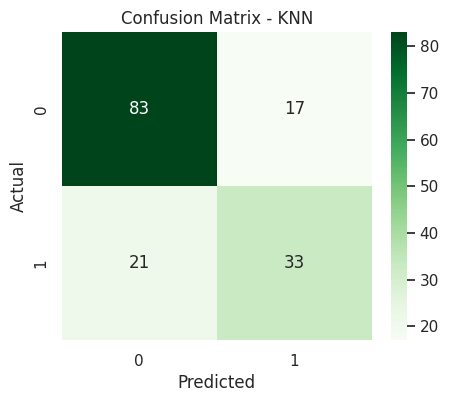

In [41]:
# 10.8: Confusion Matrix - KNN

plt.figure(figsize=(5,4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - KNN")
plt.show()


In [42]:


comparison_df = pd.DataFrame({
    "Model": ["Logistic Regression", "K-Nearest Neighbors"],
    "Accuracy": [accuracy_lr, accuracy_knn],
    "Precision": [precision_lr, precision_knn],
    "Recall": [recall_lr, recall_knn],
    "F1 Score": [f1_lr, f1_knn]
})

comparison_df


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.701299,0.586957,0.500000,0.540000
1,K-Nearest Neighbors,0.753247,0.660000,0.611111,0.634615


**🩺 Diabetes Prediction using Classical ML**
(Final Insights, Limitations & Future Scope)

a) Final Insights:

Glucose level emerged as the strongest predictor of diabetes, showing a clear separation between diabetic and non-diabetic patients.

BMI and Age also showed moderate correlation with diabetes, indicating lifestyle and age-related risk factors.

Logistic Regression performed more consistently than KNN, especially in terms of recall, which is critical in medical diagnosis.

Feature scaling significantly improved the performance of distance-based models like KNN.

Proper handling of missing values (zero treated as missing) had a major impact on model reliability.

b) — Business / Medical Interpretation

🏥 Medical Interpretation

In healthcare applications, false negatives are more dangerous than false positives.

The chosen model prioritizes recall, ensuring fewer diabetic patients are misclassified as non-diabetic.

This model can be used as a decision-support tool, not as a replacement for medical diagnosis.

Early identification can help in lifestyle intervention and preventive care.

c) — Limitations of the Project

⚠️ Limitations

The dataset is relatively small and limited to a specific population.

Some features like insulin and skin thickness had many missing values, which were imputed and may affect accuracy.

The model does not account for real-time patient data or longitudinal trends.

Only classical ML models were used; no advanced ensemble or deep learning models were explored.

d) — Future Scope & Improvements

🚀 Future Scope

Apply advanced models such as Gradient Boosting or XGBoost for improved performance.

Perform hyperparameter tuning using GridSearchCV.

Use cross-validation for more robust evaluation.

Incorporate additional real-world medical features.

Deploy the model as a simple web application for real-time prediction.